# Logistic Regression Model & its Evaluation with learning curve analysis

### Data Set - Titanic data set


## Import libraries and loading the dataset

In [1]:
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

tdata = pd.read_csv('./data/titanic_data.csv') 
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Basic operations to understand the Dataset

In [2]:
...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

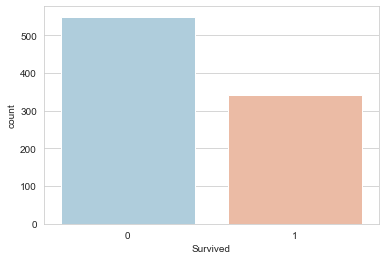

In [3]:
...

**Following code extracts and plots the fraction of passenger count that survived, by each class**

Text(0.5, 1.0, 'Fraction of passengers survived by class')

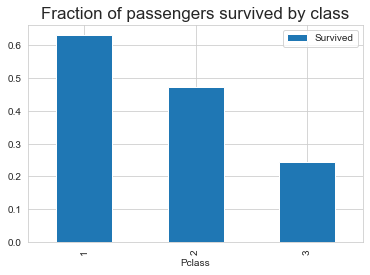

In [4]:
# Task: Display the Fraction of passengers survived by class=Survived

...

In [ ]:
# Feature Engineering tasks go here.

In [11]:
# Final Dataframe Example

tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


## Some more visualizations to understand Data better

<p style="font-size:16px;font-family:cambria">
We plot histograms, boxlots and scatterplots of the dataset and observe that <b>the class separation is not very obvious</b>. Particularly, boxplots show lot of overlap between features for two output classes. 
<br><br>
So, <b>this should be a non-trivial classification task</b>.</p>

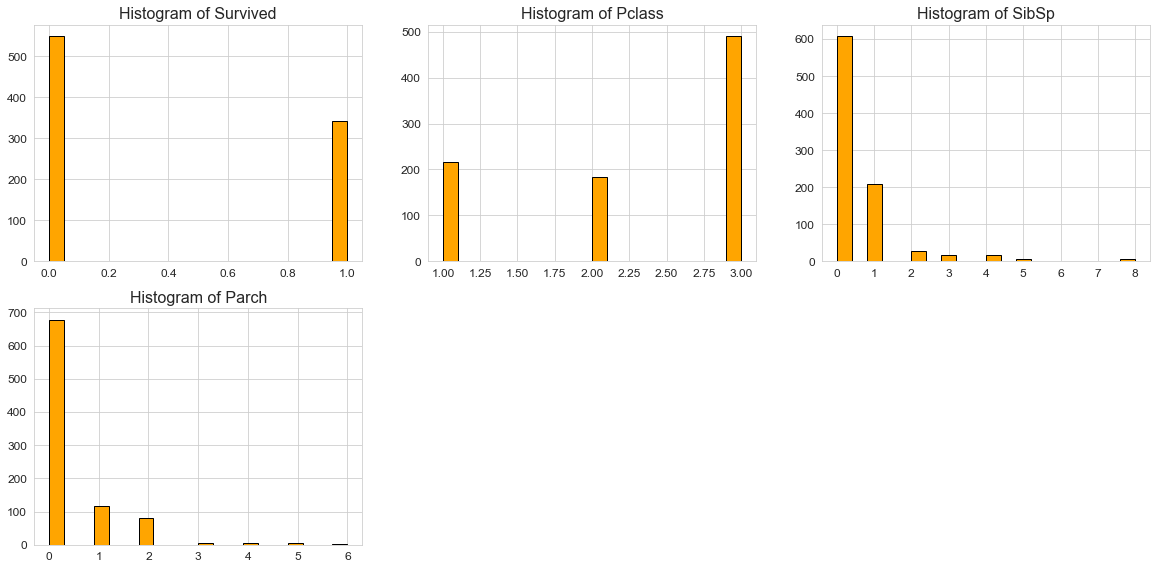

In [13]:
i=1
plt.figure(figsize=(20,20))
for c in tdata.describe().columns[:-1]:
   ...
plt.show()

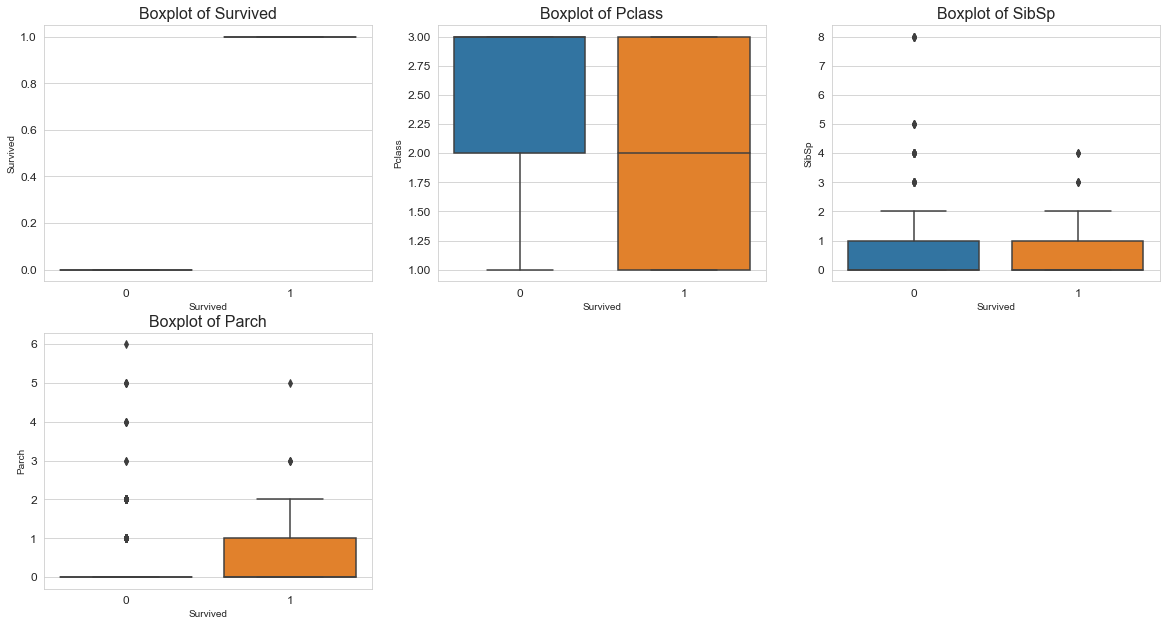

In [46]:
i=1
plt.figure(figsize=(20,33))
for c in tdata.columns[:-1]:
    ...
plt.show()

## Test/train/validation split

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
### First divide train and test data in 70:30 ratio

...

In [17]:
print("Shape of test set:", X_test.shape)
print("Shape of training set:", X_train.shape)

Shape of test set: (268, 4)
Shape of training set: (623, 4)


In [18]:
X_train.head(10)

,Pclass,SibSp,Parch,Fare
195,1,0,0,146.5208
150,2,0,0,12.5250
572,1,0,0,26.3875
134,2,0,0,13.0000
96,1,0,0,34.6542
24,3,3,1,21.0750
627,1,0,0,77.9583
573,3,0,0,7.7500
370,1,1,0,55.4417
43,2,1,2,41.5792


In [20]:
y_train.head()

195    1
150    0
572    1
134    0
96     0
Name: Survived, dtype: int64

In [21]:
### Then further divide the test set in 50:50 ratio into validation set and test set
...

### Evaluating on Validation Set

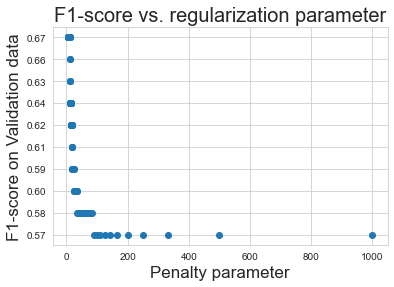

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=...
penalty=...
logmodel=...
val_predictions =...
...

for i in range(1,nsimu):
        ...

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on Validation data",fontsize=17)
plt.show()

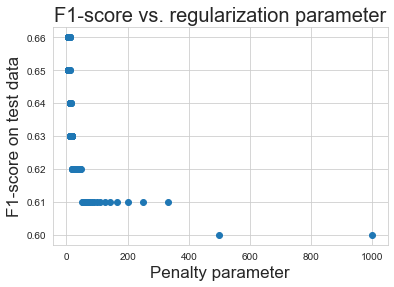

In [26]:
nsimu=...
...

for i in range(1,nsimu):
        ...
plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

### Evaluating by varying Test-set size

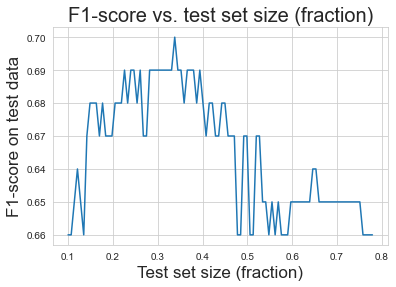

In [25]:
...

plt.plot(test_fraction[1:len(test_fraction)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. test set size (fraction)",fontsize=20)
plt.xlabel("Test set size (fraction)",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

### Seed Set Initialization - Random Initialization 

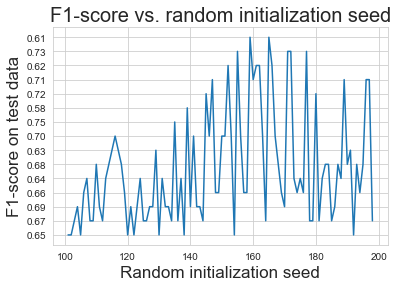

In [30]:
nsimu=...
class_report = [0]*nsimu
f1=[0]*nsimu
random_init =[0]*nsimu
for i in range(1,nsimu):
       ...
plt.plot(random_init[1:len(random_init)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. random initialization seed",fontsize=20)
plt.xlabel("Random initialization seed",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

### Evaluation Metrics:  ROC and AUC

Randomized Predictions: ROC AUC=0.500
Logistic Regression Classifier: ROC AUC=0.708


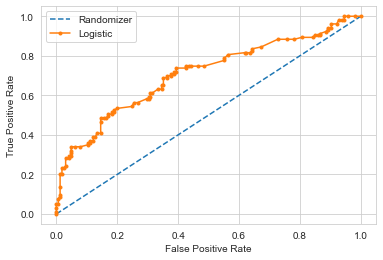

In [31]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
...
# predict probabilities
...
# keep probabilities for the positive outcome only
...
# calculate scores
...
# summarize scores
print('Randomized Predictions: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
...
# plot the roc curve for the model
...
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [39]:
from sklearn.metrics import accuracy_score,f1_score

accuracy=accuracy_score(y_test,predictions)
print(accuracy)

0.6940298507462687


### LEARNING CURVE: Varying training set size

In [40]:
from sklearn.preprocessing import StandardScaler

X_train_scaled=StandardScaler().fit_transform(X_train)
X_val_scaled=StandardScaler().fit_transform(X_val)


val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
   ...
    
    # Sampling (and scaling)
    ...
    # Fitting and prediction
    ...
    # Accuracy and F1 score
    ...
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    
    print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 15% training set size
Done for: 20% training set size
Done for: 25% training set size
Done for: 30% training set size
Done for: 35% training set size
Done for: 40% training set size
Done for: 45% training set size
Done for: 50% training set size
Done for: 55% training set size
Done for: 60% training set size
Done for: 65% training set size
Done for: 70% training set size
Done for: 75% training set size
Done for: 80% training set size
Done for: 85% training set size
Done for: 90% training set size
Done for: 95% training set size
Done for: 100% training set size


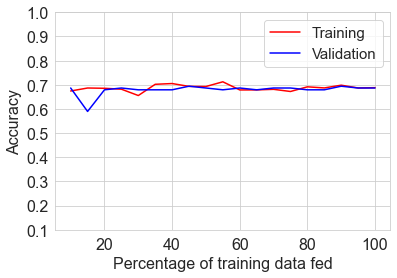

In [41]:
plt....

plt.show()